In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from Energy_Models.Informer import Informer

In [2]:
df = pd.read_csv("C:\\Users\\delll\\Downloads\\energydata_complete.csv",index_col="date")

In [3]:
scaler = MinMaxScaler().fit(df)
df    = pd.DataFrame(scaler.transform(df))

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y ,test_size=0.30,random_state=35)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
X_train = np.array(X_train)
X_test  = np.array(X_test)

In [5]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((13814, 27), (2961, 27), (13814,), (2961,))

In [6]:
X_val = np.array(X_val)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [8]:
X_train.shape ,X_test.shape 

((13814, 1, 27), (2961, 1, 27))

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = Informer(1,27,1).getModel()

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 27)]           0         
                                                                 
 token_embedding_2 (TokenEmb  (None, 1, 32)            864       
 edding)                                                         
                                                                 
 encoder_1 (Encoder)         (None, 1, 32)             5376      
                                                                 
 decoder_1 (Decoder)         (None, 1, 32)             8448      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

In [11]:
model.compile(optimizer='adam', loss ='mse')
history = model.fit(X_train , y_train, epochs=100, batch_size=64, verbose= 1,validation_split=0.2,callbacks=callback)

Epoch 1/100
173/173 [==============================] - 12s 25ms/step - loss: 0.0520 - val_loss: 0.0102
Epoch 2/100
173/173 [==============================] - 2s 14ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 3/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 4/100
173/173 [==============================] - 2s 13ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 5/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 6/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 7/100
173/173 [==============================] - 2s 13ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 8/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 9/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0088 - val_loss: 0.0079
Epoch 10/100
173/173 [==============================] - 2s 12ms/step - loss: 0.00

173/173 [==============================] - 2s 11ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 81/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0071 - val_loss: 0.0075
Epoch 82/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 83/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 84/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 85/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0072 - val_loss: 0.0081
Epoch 86/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 87/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0071 - val_loss: 0.0074
Epoch 88/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 89/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0071 - 

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
def root_mean_squared_log_error(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: # check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
def print_metrics():
    print('Train   RMSE  value   : %.3f ' % root_mean_squared_error(y_train, model.predict(X_train)))
    print('Train   MSE   value   : %.3f ' % mean_squared_error(y_train, model.predict(X_train)))
    print('Train   R2    value   : %.3f ' % r2_score(y_train,model.predict(X_train)))
    print('Train   MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_train, model.predict(X_train)))
    print('Train   MAE   value   : %.3f ' % mean_absolute_error(y_train, model.predict(X_train)))
    print('---------------------------------------------')
    print('Test    RMSE  value   : %.3f ' % root_mean_squared_error(y_test, model.predict(X_test)))
    print('Test    MSE   value   : %.3f ' % mean_squared_error(y_test, model.predict(X_test)))
    print('Test    R2    value   : %.3f ' % r2_score(y_test, model.predict(X_test)))
    print('Test    MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print('Test    MAE   value   : %.3f ' % mean_absolute_error(y_test, model.predict(X_test)))

In [13]:
print_metrics()

432/432 [==============================] - 4s 6ms/step
Train   RMSE  value   : 0.082 
432/432 [==============================] - 2s 4ms/step
Train   MSE   value   : 0.007 
432/432 [==============================] - 2s 5ms/step
Train   R2    value   : 0.268 
432/432 [==============================] - 2s 5ms/step
Train   MAPE  value   : 60534914612.454 
432/432 [==============================] - 2s 5ms/step
Train   MAE   value   : 0.045 
---------------------------------------------
93/93 [==============================] - 0s 5ms/step
Test    RMSE  value   : 0.080 
93/93 [==============================] - 0s 4ms/step
Test    MSE   value   : 0.006 
93/93 [==============================] - 0s 4ms/step
Test    R2    value   : 0.243 
93/93 [==============================] - 1s 5ms/step
Test    MAPE  value   : 0.659 
93/93 [==============================] - 0s 5ms/step
Test    MAE   value   : 0.045 


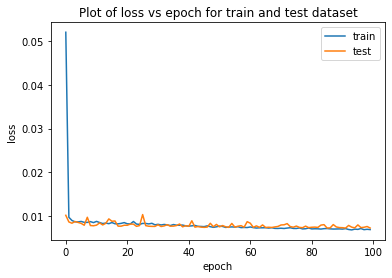

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()